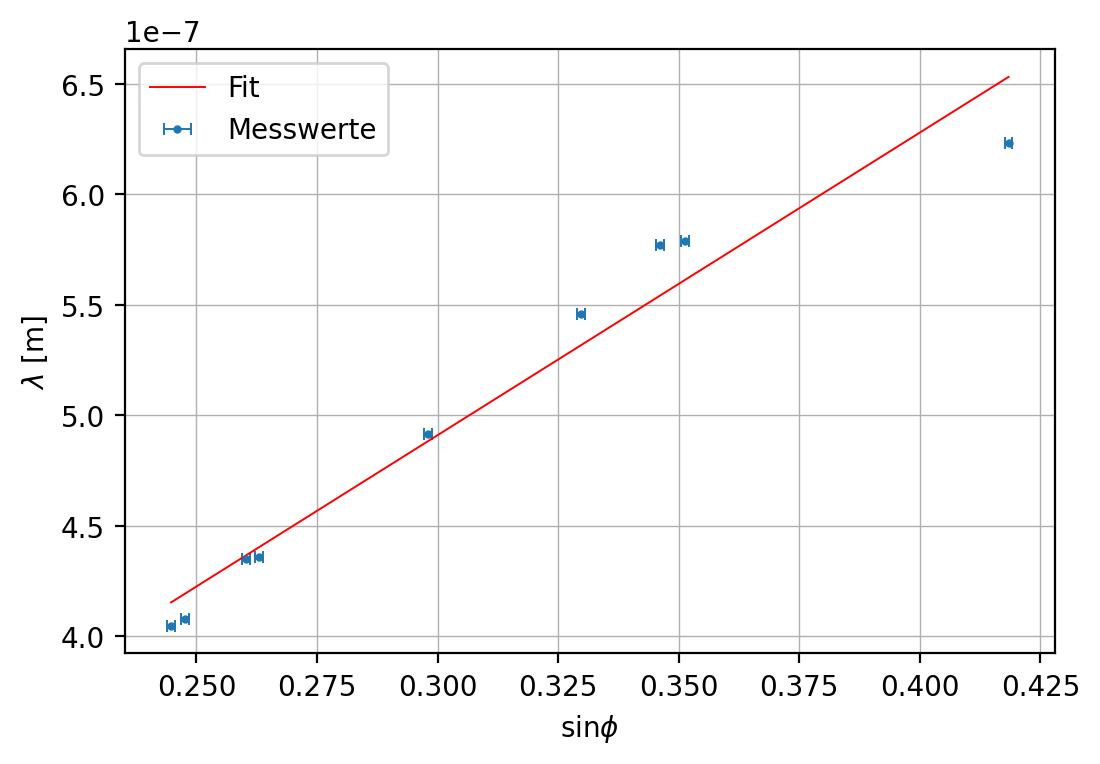

[1.36954013e-06 8.01406599e-08] [1.06785325e-07 3.35098610e-08]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

phi = np.radians(np.loadtxt("hg.txt", usecols = 0) + 1 / 60 * np.loadtxt("hg.txt", usecols = 1))
phi = np.sin(phi)
sigma = np.cos(phi) * np.radians( 3 / 60)

lam = np.array([623.44,579.07,576.96,546.07,491.61,435.83,434.75,407.78,404.66])*1e-9


def f(x,m,b): #Hier wird die Funktion beschrieben deren Verlauf genähert werden soll. Dabei ist wichtig, dass x an erster Stelle steht
	return  m*x+b

p0 = [0,0]
x_test = np.linspace(np.min(phi),np.max(phi),1000)

fit, err = opt.curve_fit(f, phi,lam, p0, sigma) #Durch diese Zeile werden die Parameter des Fits berechnet. Bei der chi²-Methode wird nur der y-Fehler beachtet.
# dokumentation von curve_fit: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
perr = np.sqrt(np.diag(err)) #hier wird der zu den Parametern gehörige Fehler bestimmt



plt.figure(dpi=200) #erstellen einer neuen Abbildung


plt.errorbar(phi,lam,xerr=sigma, marker='.',markersize=4, ls='', capsize=2, capthick=0.7, lw=0.7, label="Messwerte") #Die Messwerte werden mit Fehler dargestellt. 
plt.plot(x_test, f(x_test,fit[0],fit[1]), lw = 0.7,label="Fit",color = 'r') #Hiermit wird die Funktion dargestellt) 



plt.ylabel("$ \lambda $ [m]") #x-Beschriftung
plt.xlabel("$\sin \phi$") #y-Beschriftung
plt.grid(lw=0.5) #Darstellung eines Rasters im Hintergrund
plt.legend() #Anzeige der Legende 
plt.savefig('hg.pdf') #Hiermit wird der Plot in der Datei 'Plot.pdf' gespeichert
plt.show() #Vorschau des Plots

print(fit,perr)



In [24]:
d = 137e-8
derr = 11e-8
sinphierr = np.cos(phi) * np.radians( 3 / 60)
phi = np.radians(np.loadtxt("h.txt", usecols = 0) + 1 / 60 * np.loadtxt("h.txt", usecols = 1))
phierr = np.radians(3/60)
lam = d * phi
lamerr = np.sqrt(derr**2*np.sin(phi)**2+phierr**2*d**2*np.cos(phi)**2)
print(np.sin(phi))
print(sinphierr)
print(lam)
print(lamerr)


[0.24840813 0.26162771 0.29376228 0.32199031 0.32914134 0.35211392
 0.37163791 0.39714789]
[0.00084531 0.00084227 0.00083416 0.00082619 0.00082404 0.00081678
 0.00081016 0.00080089]
[3.43920038e-07 3.62650330e-07 4.08479767e-07 4.49128485e-07
 4.59489923e-07 4.92965338e-07 5.21658551e-07 5.59517652e-07]
[2.73494236e-08 2.88021721e-08 3.23340529e-08 3.54370154e-08
 3.62231440e-08 3.87486918e-08 4.08952344e-08 4.37000447e-08]


In [12]:
##berechnung der theoretischen wellenlängen
Ry = 109678 * 100
def lam(m):
    a = Ry * (1/2**2-1/m**2)
    return 1/a

m = np.array([3,4,5,6,7,8,9,10000])
print(lam(m))

[6.56467113e-07 4.86271935e-07 4.34171371e-07 4.10291946e-07
 3.97122081e-07 3.89017548e-07 3.83649611e-07 3.64703966e-07]


In [16]:
##berechnen der Rydbergkonstante
def rydberg(lam,m):
    return 1/lam * (1/4 - 1/m**2) ** (-1)

def rydberg_err(lam,m,sig):
    return sig / lam * rydberg(lam,m)

print(rydberg(408e-9,6))
print(rydberg_err(408e-9,6,40e-9))


print(rydberg(493e-9,4))
print(rydberg_err(493e-9,4,40e-9))

11029411.764705881
1081314.8788927335
10818120.351588912
877737.9595609665
